In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load frames

In [2]:
isttc_results_folder_path = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\allen_mice\\z\\'

In [3]:
def get_merged_df(file_name_suffix_):
    sttc_df = pd.read_pickle(isttc_results_folder_path + 'not_binned_sttc\\' + 'tau_bsl_sua_sttc_' + file_name_suffix_ + '_df.pkl')
    pearson_df = pd.read_pickle(isttc_results_folder_path + 'binned_pearson\\' + 'tau_bsl_sua_pearson_' + file_name_suffix_ + '_df.pkl')
    
    sttc_df_subset = sttc_df[['unit_id', 'animal_id', 'session_id', 'area_id','acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()
    pearson_df_subset = pearson_df[['unit_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()
    
    df_merged = pd.merge(sttc_df_subset, pearson_df_subset, on='unit_id', how='inner', suffixes=('_sttc', '_pear'))
    df_merged['diff'] = df_merged['r_squared_sttc'] - df_merged['r_squared_pear']
    
    print('let sttc_df {}, len pearson_df {}'.format(len(sttc_df), len(pearson_df)))

    return df_merged

In [4]:
file_name_suffix_25 = '25ms_40lags'
df_25ms_40lags = get_merged_df(file_name_suffix_25)
df_25ms_40lags['bin_size_ms'] = 25

file_name_suffix_40 = '40ms_25lags'
df_40ms_25lags = get_merged_df(file_name_suffix_40)
df_40ms_25lags['bin_size_ms'] = 40

file_name_suffix_50 = '50ms_20lags'
df_50ms_20lags = get_merged_df(file_name_suffix_50)
df_50ms_20lags['bin_size_ms'] = 50

file_name_suffix_60 = '60ms_16lags'
df_60ms_16lags = get_merged_df(file_name_suffix_60)
df_60ms_16lags['bin_size_ms'] = 60

file_name_suffix_75 = '75ms_13lags'
df_75ms_13lags = get_merged_df(file_name_suffix_75)
df_75ms_13lags['bin_size_ms'] = 75

file_name_suffix_100 = '100ms_10lags'
df_100ms_10lags = get_merged_df(file_name_suffix_100)
df_100ms_10lags['bin_size_ms'] = 100

df_merged = pd.concat([df_25ms_40lags, df_40ms_25lags, df_50ms_20lags, df_60ms_16lags, df_75ms_13lags, df_100ms_10lags])
df_merged.reset_index(inplace=True, drop=True)

let sttc_df 18168, len pearson_df 18168
let sttc_df 18168, len pearson_df 18168
let sttc_df 18168, len pearson_df 18168
let sttc_df 18168, len pearson_df 18168
let sttc_df 18168, len pearson_df 18168
let sttc_df 18168, len pearson_df 18168


In [5]:
df_merged.head()

,unit_id,animal_id,session_id,area_id,acf_decay_1_4_sttc,r_squared_sttc,tau_sttc,tau_ms_sttc,acf_fit_failed_sttc,acf_decay_1_4_pear,r_squared_pear,tau_pear,tau_ms_pear,acf_fit_failed_pear,diff,bin_size_ms
0,950911624,744912849,766640955,MB,False,0.802658,0.085248,2.131211,False,False,0.754440,0.074549,1.863734,False,0.048218,25
1,950911641,744912849,766640955,MB,False,0.865352,0.073134,1.828338,False,False,0.876434,0.072768,1.819212,False,-0.011082,25
2,950911686,744912849,766640955,MB,False,0.466156,0.072782,1.819540,False,False,NaN,NaN,NaN,True,NaN,25
3,950911657,744912849,766640955,MB,False,0.816500,1.308019,32.700473,False,False,0.808520,1.325507,33.137674,False,0.007980,25
4,950911696,744912849,766640955,MB,False,0.971180,14.276420,356.910512,False,False,0.978647,10.036567,250.914180,False,-0.007466,25


### Plots

#### Quality

##### Same domain, different bin sizes/naumber of lags

n_95_fits_sttc 76496, n_95_fits_pearson 71635
4.459305739028328


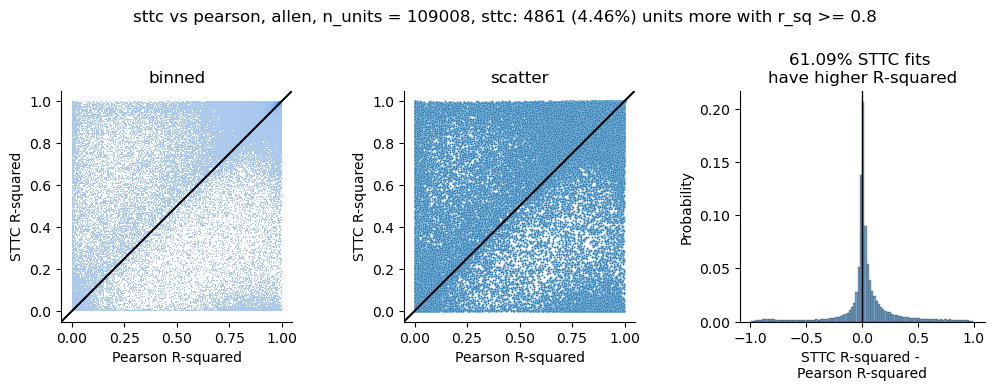

In [6]:
n_95_fits_sttc = len(df_merged.query('r_squared_sttc >= 0.8'))
n_95_fits_pearson = len(df_merged.query('r_squared_pear >= 0.8'))

print('n_95_fits_sttc {}, n_95_fits_pearson {}'.format(n_95_fits_sttc, n_95_fits_pearson))

diff_0_8 = (n_95_fits_sttc - n_95_fits_pearson) / len(df_merged) * 100
print(diff_0_8)

n_sttc_better = len(df_merged.query('diff > 0'))
n_sttc_better_perc = n_sttc_better / len(df_merged) * 100

fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, bins=200)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson R-squared')
axes[0].set_ylabel('STTC R-squared')
axes[0].set_title('binned')

sns.scatterplot(ax=axes[1], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, s=2)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')
axes[1].set_title('scatter')

sns.histplot(ax=axes[2], x=df_merged['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

fig.suptitle('sttc vs pearson, allen, n_units = ' + str(len(df_merged)) 
             + ', sttc: ' + str(n_95_fits_sttc - n_95_fits_pearson) 
             + ' (' + str(np.round(diff_0_8, 2)) +'%)' + ' units more with r_sq >= 0.8', y=1.15)

sns.despine()

#fig.savefig(isttc_results_folder_path + 'allen_sttc_vs_pearson.png' , bbox_inches='tight')

##### 50 ms 20 lags

n_95_fits_sttc 12587, n_95_fits_pearson 11553
5.691325407309556


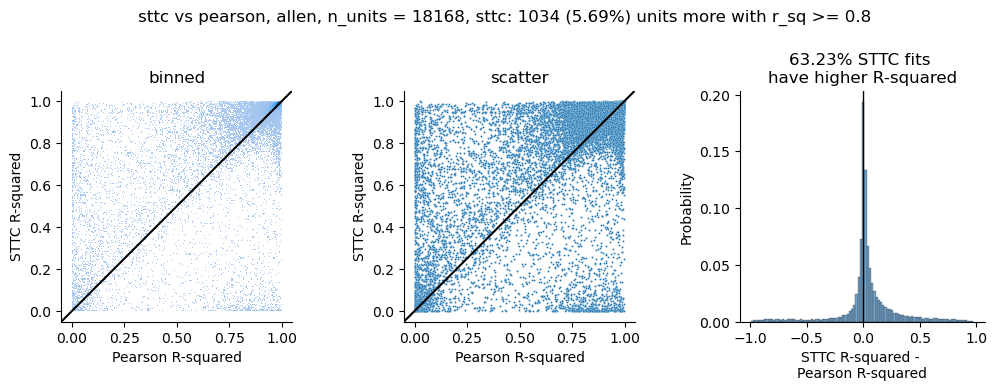

In [10]:
n_95_fits_sttc = len(df_merged.query('r_squared_sttc >= 0.8 and bin_size_ms == 50'))
n_95_fits_pearson = len(df_merged.query('r_squared_pear >= 0.8 and bin_size_ms == 50'))

print('n_95_fits_sttc {}, n_95_fits_pearson {}'.format(n_95_fits_sttc, n_95_fits_pearson))

diff_0_8 = (n_95_fits_sttc - n_95_fits_pearson) / len(df_merged.query('bin_size_ms == 50')) * 100
print(diff_0_8)

n_sttc_better = len(df_merged.query('diff > 0 and bin_size_ms == 50'))
n_sttc_better_perc = n_sttc_better / len(df_merged.query('bin_size_ms == 50')) * 100

fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=df_merged.query('bin_size_ms == 50')['r_squared_pear'].values, 
             y=df_merged.query('bin_size_ms == 50')['r_squared_sttc'].values, bins=200)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson R-squared')
axes[0].set_ylabel('STTC R-squared')
axes[0].set_title('binned')

sns.scatterplot(ax=axes[1], x=df_merged.query('bin_size_ms == 50')['r_squared_pear'].values, 
                y=df_merged.query('bin_size_ms == 50')['r_squared_sttc'].values, s=2)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')
axes[1].set_title('scatter')

sns.histplot(ax=axes[2], x=df_merged.query('bin_size_ms == 50')['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

fig.suptitle('sttc vs pearson, allen, n_units = ' + str(len(df_merged.query('bin_size_ms == 50'))) 
             + ', sttc: ' + str(n_95_fits_sttc - n_95_fits_pearson) 
             + ' (' + str(np.round(diff_0_8, 2)) +'%)' + ' units more with r_sq >= 0.8', y=1.15)

sns.despine()

#fig.savefig(isttc_results_folder_path + 'allen_sttc_vs_pearson.png' , bbox_inches='tight')

#### Taus

##### HP areas (50ms bins)

In [13]:
df_50ms_20lags_sttc = df_50ms_20lags.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.8')

,unit_id,animal_id,session_id,area_id,acf_decay_1_4_sttc,r_squared_sttc,tau_sttc,tau_ms_sttc,acf_fit_failed_sttc,acf_decay_1_4_pear,r_squared_pear,tau_pear,tau_ms_pear,acf_fit_failed_pear,diff,bin_size_ms
0,950911624,744912849,766640955,MB,False,0.414461,0.073716,3.685779e+00,False,False,0.042191,0.076884,3.844203,False,0.372270,50
1,950911641,744912849,766640955,MB,False,0.323411,0.073929,3.696451e+00,False,False,0.288688,0.074411,3.720568,False,0.034722,50
2,950911686,744912849,766640955,MB,False,0.252137,0.073141,3.657060e+00,False,False,0.817152,0.692019,34.600962,False,-0.565014,50
3,950911657,744912849,766640955,MB,False,0.964727,0.238859,1.194296e+01,False,False,0.961196,0.067634,3.381722,False,0.003532,50
4,950911696,744912849,766640955,MB,True,0.982544,7.783305,3.891653e+02,False,True,0.985519,4.952342,247.617112,False,-0.002976,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18163,951190560,827809884,847657808,VISrl,True,0.980718,2.595979,1.297989e+02,False,True,0.988413,2.643376,132.168817,False,-0.007694,50
18164,951190571,827809884,847657808,VISrl,True,0.635428,0.098596,4.929823e+00,False,True,0.688158,0.397321,19.866056,False,-0.052730,50
18165,951190848,827809884,847657808,VISrl,True,0.906775,2.214829,1.107414e+02,False,True,0.869454,3.019812,150.990596,False,0.037321,50
18166,951190594,827809884,847657808,VISrl,True,0.760562,-70726.306591,-3.536315e+06,False,True,0.980153,4.435181,221.759032,False,-0.219591,50


In [12]:
tau_df_hp = df_merged.query('area_id == "CA1" or area_id == "CA2" or area_id == "CA3" or area_id == "DG" or area_id == "SUB" and bin_size_ms == 50').copy()
print(len(tau_df_hp))
tau_df_hp_0_1000 = tau_df_hp.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.8').copy()
print(len(tau_df_hp_0_1000))

29679


UndefinedVariableError: name 'tau_ms' is not defined

In [ ]:
tau_df_hp_0_1000 = tau_df_hp.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.8').copy()
print(len(tau_df_hp_0_1000))

#tau_df_hp_0_1000['tau_ms_log10'] = np.log10(sttc_df_hp_0_1000['tau_ms'])

In [ ]:
# by area
sttc_df_hp_0_1000_median = sttc_df_hp_0_1000.groupby(by='area_id', as_index=False)['tau_ms'].median().sort_values(by='tau_ms')
sttc_df_hp_0_1000_median

In [ ]:
# by area
sttc_df_hp_0_1000_mean = sttc_df_hp_0_1000.groupby(by='area_id', as_index=False)['tau_ms'].mean().sort_values(by='tau_ms')
sttc_df_hp_0_1000_mean

In [ ]:
# by animal and area
sttc_df_hp_0_1000_animal_med = sttc_df_hp_0_1000.groupby(by=['animal_id', 'area_id'], as_index=False)['tau_ms'].median()
sttc_df_hp_0_1000_animal_med

In [ ]:
# by animal and area
sttc_df_hp_0_1000_animal_mean = sttc_df_hp_0_1000.groupby(by=['animal_id', 'area_id'], as_index=False)['tau_ms'].mean()
sttc_df_hp_0_1000_animal_mean

In [ ]:
n_animals = len(sttc_df_hp_0_1000_animal_mean.groupby(by='animal_id', as_index=False).count())
n_animals

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# sns.stripplot(ax=axes[0], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_median['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_med, color='white', s=3)
sns.violinplot(ax=axes[0], x = 'area_id', y='tau_ms', 
               order=sttc_df_hp_0_1000_median['area_id'].values,
               data=sttc_df_hp_0_1000_animal_med, cut=0,  scale='width')
axes[0].set_title('med animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.violinplot(ax=axes[1], x = 'area_id', y='tau_ms', 
               order=sttc_df_hp_0_1000_mean['area_id'].values,
               data=sttc_df_hp_0_1000_animal_mean, cut=0,  scale='width')
# sns.stripplot(ax=axes[1], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_mean['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_mean, color='white', s=3)
axes[1].set_title('mean animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.despine()

fig.savefig(isttc_results_folder_path + 'taus_in_hp_mouse_level.png' , bbox_inches='tight')

In [ ]:
# fig, axes = plt.subplots(1,1, figsize=(5,3))

# sns.stripplot(ax=axes, x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values, 
#               data=sttc_df_hp_0_1000_median,
#               color='black', label='median', legend=False)
# sns.stripplot(ax=axes, x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values,
#               data=sttc_df_hp_0_1000_mean,
#               color='steelblue', label='mean', legend=False)
# axes.axhline(y=100, lw=0.5, c='k')
# axes.axhline(y=50, lw=0.5, c='k')
# # axes[0,0].axhline(y=200, lw=0.5, c='k')
# # axes[0,0].axhline(y=250, lw=0.5, c='k')
# axes.set_title('sttc in HP, 50ms, 10lags, allen')
# axes.set_ylim([0,200])

# sns.despine()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x = 'area_id', y='tau_ms_log10', order=sttc_df_hp_0_1000_median['area_id'].values,
               data=sttc_df_hp_0_1000, cut=0,  scale='width')
axes[0].set_title('units sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))

sns.stripplot(ax=axes[1], x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values, 
              data=sttc_df_hp_0_1000_median,
              color='black', label='median', legend=False)

sns.stripplot(ax=axes[2], x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values,
              data=sttc_df_hp_0_1000_mean,
              color='steelblue', label='mean', legend=False)
axes[2].axhline(y=100, lw=0.5, c='k')
axes[2].axhline(y=150, lw=0.5, c='k')
axes[2].set_title('mean sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))
axes[2].set_ylim([50,200])

#axes[0].axhline(y=68, lw=0.5, c='k')
axes[1].axhline(y=100, lw=0.5, c='k')
axes[1].axhline(y=50, lw=0.5, c='k')
axes[1].set_title('med sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))
axes[1].set_ylim([30,150])

sns.despine()

fig.savefig(isttc_results_folder_path + 'taus_in_hp_unit_and_area.png' , bbox_inches='tight')

#### Areas from Rudelt et al (6 visual and 2 thalamic)

In [ ]:
sttc_df_subset['area_id'].unique()

In [ ]:
sttc_df_rudelt = sttc_df_subset.query('area_id == "VISp" or area_id == "VISl" or area_id == "VISal" or area_id == "VISrl" or area_id == "VISam" or area_id == "VISpm"').copy()
print(len(sttc_df_rudelt))

sttc_df_rudelt_0_1000 = sttc_df_rudelt.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.5').copy()
print(len(sttc_df_rudelt_0_1000))

In [ ]:
# by area
sttc_df_rudelt_median = sttc_df_rudelt_0_1000.groupby(by='area_id', as_index=False)['tau_ms'].median().sort_values(by='tau_ms')
sttc_df_rudelt_median